## Unsupervised Learning
Our goal is to construct a unsupervised model for indecating two independent stocks; the indicator would be including price or volume.
<tb>


### 1. Importing Data
- [quantmod](https://www.quantmod.com/examples/intro/) is quantitative financial Modeling and trading frameword for R
- We will use 'quantmod' package and getSymbols(##, from='yyyy-mm-dd') for importing data from google finance.
- Initially, we are going to download the historical data of Apple.inc's from 2010-01-04 to 2019-01-03,(10 years).




In [1]:
library(quantmod)
from <- '2010-01-04'
to <-'2019-01-04'
# date <- c(from,to)
getSymbols("AAPL", from = from, to = to)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "AAPL"

let's take a look and understand about the data.

- As we see, we will get use of AAPL.Adjusted, the adjusted historical pricing from 2010-01-04. And AAPL.Volume will be used for later investigation.


- Then, we need to consider some other stocks that they might not share so similar feature in their business.
- To see the relation between AAPL's history price and some other not so correlated stocks' history price, i.e. _MCD_, _M_,_COST_,_BAC_.
- note we just want to see those data start from 2010 to recents
- note we need to awaked with using adjusted pricing.

In [10]:
AAPL.Adjusted.price <- AAPL$AAPL.Adjusted
# head(APPL.Adjusted.price)
invest.asset <- c('MCD','M','COST','BAC')
# for (s in invest.asset){
#     getSymbols(s,from = '2010-01-01')
# }
# MCD.Adjusted.price <- MCD$MCD.Adjusted
# head(MCD.ADjusted.price)
getSymbols('MCD',from = from,to = to)
MCD.Adjusted.price <- MCD$MCD.Adjusted
getSymbols('M',from = from,to = to)
M.Adjusted.price <- M$M.Adjusted

getSymbols('COST',from = from,to = to)
COST.Adjusted.price <- COST$COST.Adjusted

getSymbols('BAC',from = from,to = to)
BAC.Adjusted.price <- BAC$BAC.Adjusted


[1] "MCD"

[1] "M"

[1] "COST"

[1] "BAC"

We still need to see the summary of those set of data before we go stright to visualize those

In [11]:
AAPL_MCD <- data.frame(AAPL.Adjusted.price,MCD.Adjusted.price)
AAPL_M <- data.frame(AAPL.Adjusted.price,M.Adjusted.price)
AAPL_COST <- data.frame(AAPL.Adjusted.price,COST.Adjusted.price)
AAPL_BAC <- data.frame(AAPL.Adjusted.price,BAC.Adjusted.price)

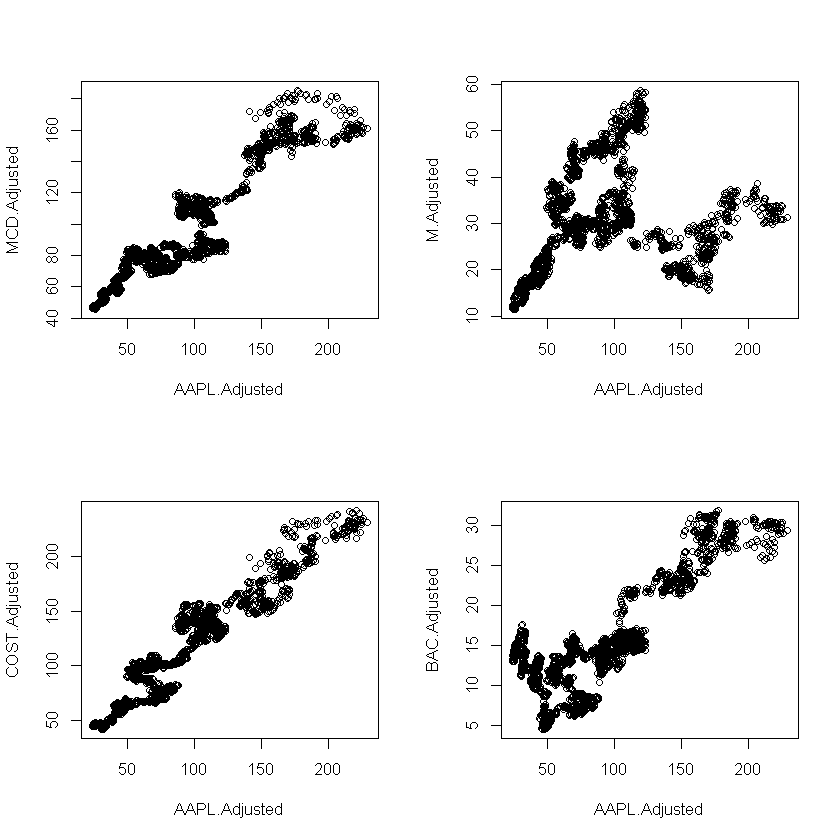

In [12]:
par(mfrow = c(2,2))
plot(AAPL_MCD)
plot(AAPL_M)
plot(AAPL_COST)
plot(AAPL_BAC)

### How about using trading volumn for indicator?
- initially, importing the data with those trading volumn.

In [7]:
AAPL.vol <- AAPL$AAPL.Volume
MCD.vol <- MCD$MCD.Volume
M.vol <- MCD$M.Volume
BAC.vol <- BAC$BAC.Volume
COST.vol <- COST$COST.Volume

In [9]:
# AAPL_M.vol <- data.frame(AAPL.vol,M.vol)
AAPL_MCD.vol <- data.frame(AAPL.vol,MCD.vol)
AAPL_BAC.vol <- data.frame(AAPL.vol,BAC.vol)
AAPL_COST.vol <- data.frame(AAPL.vol,COST.vol)

ERROR: Error in data.frame(AAPL.vol, MCD.vol): object 'AAPL.vol' not found


In [9]:
options(repr.plot.width = 6, repr.plot.height = 4)
plot(AAPL_MCD.vol)
# plot(AAPL_M.vol)
plot(AAPL_COST.vol)
plot(AAPL_BAC.vol)

ERROR: Error in plot(AAPL_MCD.vol): object 'AAPL_MCD.vol' not found


### 2. Normalization

In term of understanding, the scalling of the data set does not unveil enough for doing Clustering. It comes that we need to normalizate them. There are two type of normalization:

- **Normailization** is the adjustment of each individually, while
- Feature normalization indicates that adjust each feature in the same way acorss all examples.

When we are normalize, we are actually adjusting the range of all features, So that the price between stocks with larger ranges will not be over-emphasised.

First, we should making our own *Normalized()* function : 

In [14]:
normalize <- function(x){
    num <- x - min(x)
    denorm <- max(x) - min(x)
    return (num/denorm)
}

In [15]:
## Normalize the AAPL's Adjusted price
AAPL.Adjust.norm.price <- normalize(AAPL.Adjusted.price)
## Normalize the M's Adjusted price
M.Adjusted.norm.price <- normalize(M.Adjusted.price)
## as.data.frame
# summary(AAPL.Adjust.norm.price)

# dim(AAPL.Adjust.norm.price)
# dim(M.Adjusted.norm.price)


### 3. After Normalization
 - Like what we have done, pairing two normalized stocks' price in a row. We are always let the AAPL's on the first axis.
 - Because, we are investigating whehter there's a factor for determining one stock's behaviors, by comparing other stocks' features.


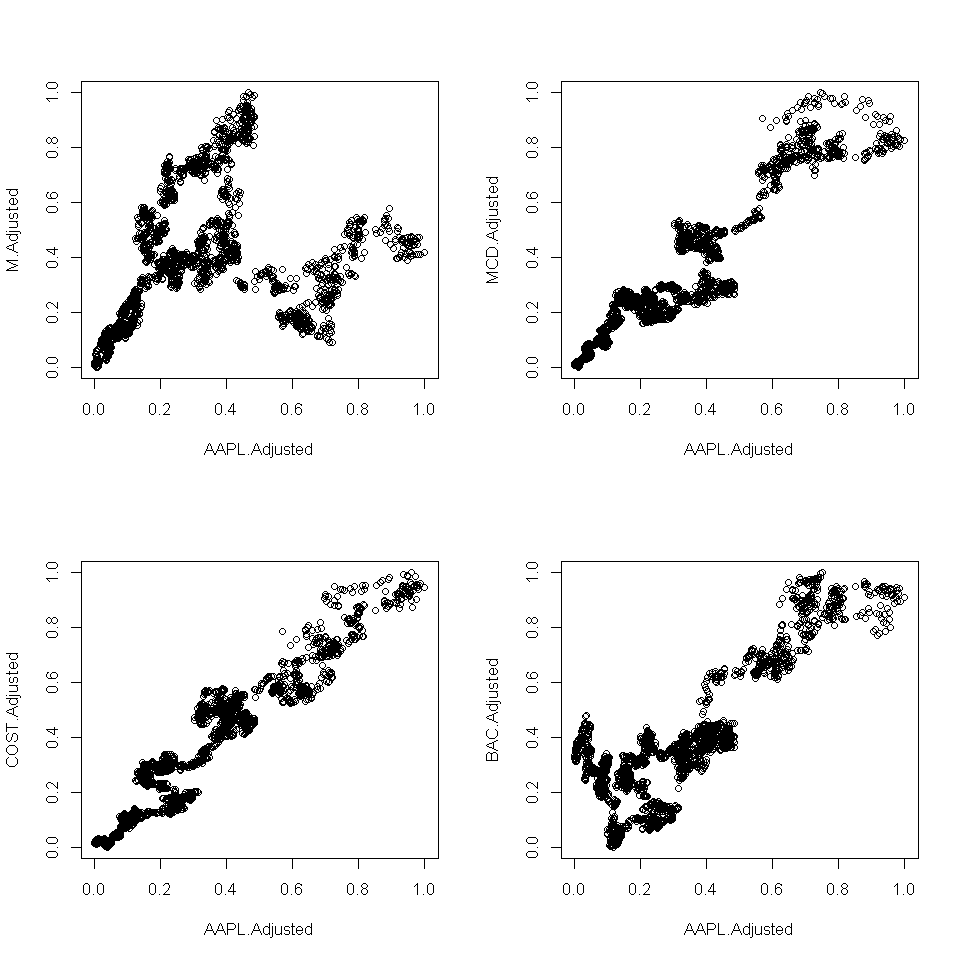

In [19]:
## visualize the normalized AAPL and M together
options(repr.plot.width=8, repr.plot.height=8)
AAPL_M.norm.adjusted.price <- data.frame(AAPL.Adjust.norm.price,M.Adjusted.norm.price)
MCD.Adjusted.norm.price<-normalize(MCD.Adjusted.price) ## MCD adjusted norm price
AAPL_MCD.norm.Adjusted.price <- data.frame(AAPL.Adjust.norm.price,MCD.Adjusted.norm.price) ## combine AAPL and MCD
COST.Adjusted.norm.price <- normalize(COST.Adjusted.price) ## COST 
AAPL_COST.norm.Adjusted.price <- data.frame(AAPL.Adjust.norm.price,COST.Adjusted.norm.price) ## dataFrame AAPL and COST
BAC.Adjusted.norm.price <- normalize(BAC.Adjusted.price)
AAPL_BAC.Adjusted.norm.pric  <- data.frame(AAPL.Adjust.norm.price,BAC.Adjusted.norm.price)

par(mfrow = c(2,2))

plot(AAPL_M.norm.adjusted.price)
plot(AAPL_MCD.norm.Adjusted.price)
plot(AAPL_COST.norm.Adjusted.price)
plot(AAPL_BAC.Adjusted.norm.pric)


In [22]:
cor(AAPL_BAC.Adjusted.norm.pric)
cor(AAPL_COST.norm.Adjusted.price)
cor(AAPL_M.norm.adjusted.price)
cor(AAPL_MCD.norm.Adjusted.price)

,AAPL.Adjusted,BAC.Adjusted
AAPL.Adjusted,1.0000000,0.8511123
BAC.Adjusted,0.8511123,1.0000000


,AAPL.Adjusted,COST.Adjusted
AAPL.Adjusted,1.0000000,0.9559307
COST.Adjusted,0.9559307,1.0000000


,AAPL.Adjusted,M.Adjusted
AAPL.Adjusted,1.0000000,0.2319174
M.Adjusted,0.2319174,1.0000000


,AAPL.Adjusted,MCD.Adjusted
AAPL.Adjusted,1.0000000,0.9305899
MCD.Adjusted,0.9305899,1.0000000


## 4. Discussion(part 1)

- By looking at those scatter plots, we notice those data points are not randomly distributed within the normalized scale.Specially,the correlation between each considered stock prices with AAPL are high (one exception, the Macy's price).
- That makes the clustering or classicating no sense.
- 